Comparison of different optimizers on Vanilla QAOA on MaxCut problem



In [1]:
from qaoa import QAOA,problems,mixers,initialstates

In [2]:
import numpy as np
import networkx as nx
from plotroutines import *

from qiskit_algorithms.optimizers import SPSA, QNSPSA, COBYLA, NELDER_MEAD

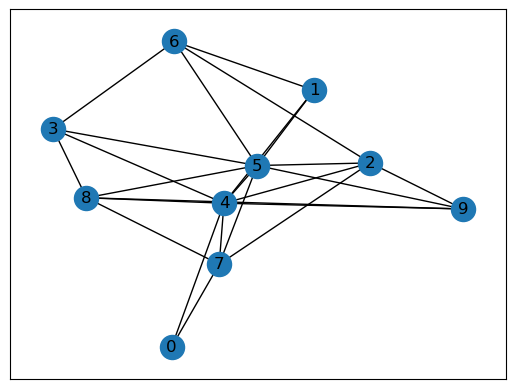

In [3]:
G= nx.read_gml("w_ba_n10_k4_0.gml")
nx.draw_networkx(G)


In [5]:

optimizers = {}
plotstyle= {}

#Dictionary for different parameter values for SPSA optimizer and 
settings_parametervalues = {
    "maxiter": 70,
    "blocking": True,
    "allowed_increase": 0,
    "second_order": True,
    "regularization": 0.01,
}
#adding spsa to the optimizer dictionary [optimizer name, parameters-values]
optimizers["spsa"] = [SPSA, settings_parametervalues.copy()] 

#plotstyle for spsa for plotting later
plotstyle["spsa"] = "+r"




In [6]:
#initializing qaoa dictionary for optimizername-QAOA(...,optimizername)
qaoa = {}
for key in optimizers:
    qaoa[key] = QAOA(
        initialstate=initialstates.Plus(),
        problem=problems.MaxCut(G=G),
        mixer=mixers.X(),
        optimizer=optimizers[key],
    )

In [8]:
#Calculating minimum eigenvalue for depth p=10 iterated from p=1
maxdepth=10
for key in optimizers:
    qaoa[key].optimize(depth=maxdepth)

2025-05-15 23:52:23 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2025-05-15 23:52:25 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2025-05-15 23:52:25 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2025-05-15 23:52:25 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2025-05-15 23:52:36 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2025-05-15 23:52:36 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2025-05-15 23:52:58 [info     ] cost(depth 1 = -6.86972009529155 file=qaoa.qaoa func=optimize
2025-05-15 23:53:22 [info     ] cost(depth 2 = -7.362515302425452 file=qaoa.qaoa func=optimize
2025-05-15 23:53:48 [info     ] cost(depth 3 = -7.736646818681746 file=qaoa.qaoa func=optimize
2025-05-15 23:54:16 [info     ] cost(depth 4 = -7.970595319163494 f

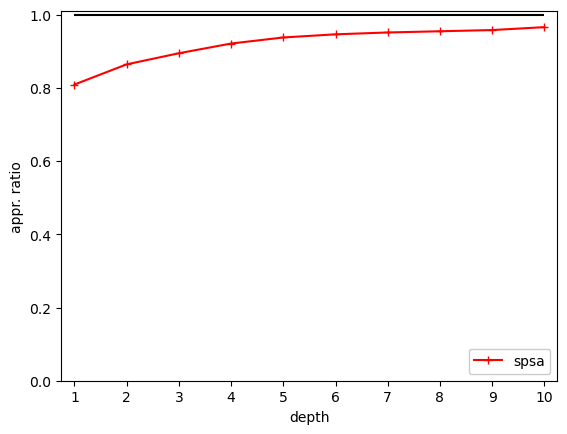

In [10]:
fig = plt.figure()
for key in optimizers:
    plot_ApproximationRatio(
        qaoa[key],
        maxdepth,
        mincost= -8.657714089848158,  # precalculated
        maxcost=0,
        label=key,
        style=plotstyle[key] + "-",
        fig=fig,
    )

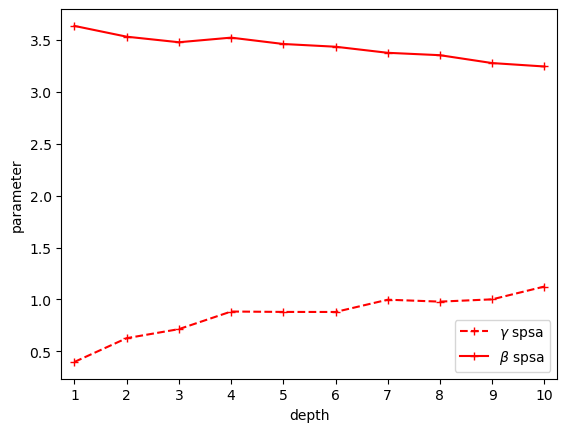

In [11]:
p=maxdepth
fig = plt.figure(p)

for key in optimizers:
    plot_angles(qaoa[key], p , label=key, style=plotstyle[key],fig=fig)